## Classification - Logistic Regression

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
# Load the dataset
data = pd.read_csv('csv/green_tech_data.csv')

In [67]:
data.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


### As the sustainability has only 0 and 1 possibility, this is a binary classification

In [68]:
# Inspect for missing values and general structure
print(data.isnull().sum())

carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64


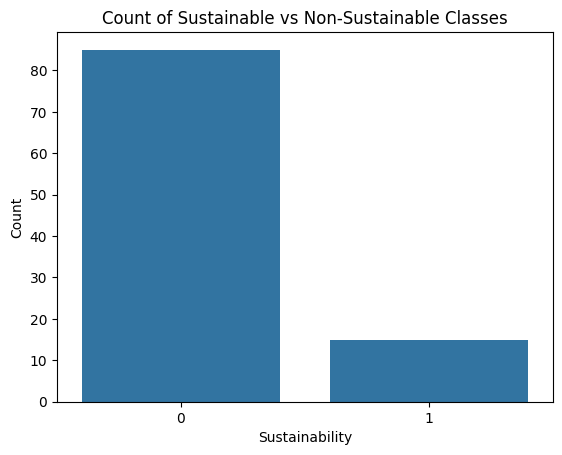

In [69]:
# Count plot to check if the data is balanced
sns.countplot(x='sustainability', data=data)
plt.title('Count of Sustainable vs Non-Sustainable Classes')
plt.xlabel('Sustainability')
plt.ylabel('Count')
plt.show()

### This is an unbalanced data, that's why do the count plot.

In [70]:
# Handle missing values if necessary
#data.fillna(data.mean(), inplace=True)

In [71]:
# Example feature selection
# x is independent 
# y is dependent
X = data[['carbon_emissions', 'energy_output', 'renewability_index', 'cost_efficiency']]
y = data['sustainability']  # Target variable

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# Initiate Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [74]:
y_pred = model.predict(X_test)
# X_test is the actual data

In [75]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [76]:
# If you see y_pred, you'll see one data instance to be incorrect
y_test

83    0
53    0
70    0
45    0
44    0
39    0
22    0
80    0
10    1
0     1
18    0
30    0
73    0
33    0
90    0
4     0
76    0
77    1
12    0
31    0
Name: sustainability, dtype: int64

In [77]:
# The actual data
X_test

,carbon_emissions,energy_output,renewability_index,cost_efficiency
83,72.245423,889.605418,0.093982,4.448624
53,363.189573,540.507484,0.316922,1.233205
70,320.285669,709.807926,0.809361,0.953501
45,281.882800,133.198253,0.928319,3.271325
44,140.572994,356.356445,0.015457,2.293271
39,204.053373,974.603874,0.177111,0.940254
22,152.250627,386.203127,0.093675,3.470888
80,352.086199,406.959716,0.890005,1.031742
10,57.204573,360.776308,0.548734,2.475371
0,181.089042,128.286267,0.642032,0.732568


In [78]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.95


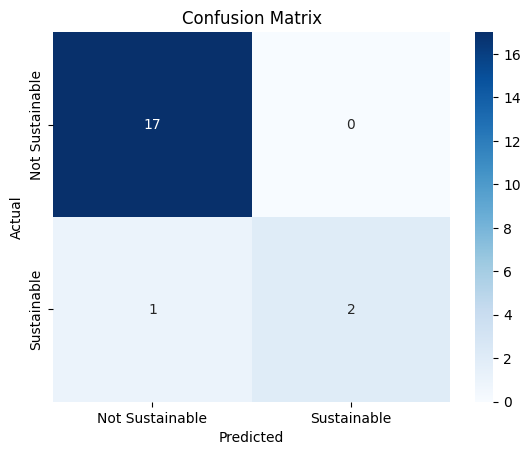

In [79]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Sustainable', 'Sustainable'], 
            yticklabels=['Not Sustainable', 'Sustainable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [80]:
# Classification Report
print(classification_report(y_test, y_pred, target_names=['Not Sustainable', 'Sustainable']))

                 precision    recall  f1-score   support

Not Sustainable       0.94      1.00      0.97        17
    Sustainable       1.00      0.67      0.80         3

       accuracy                           0.95        20
      macro avg       0.97      0.83      0.89        20
   weighted avg       0.95      0.95      0.95        20



In [81]:
# Feature importance
coefficients = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])
print(coefficients)

                    Coefficient
carbon_emissions      -0.023347
energy_output          0.001097
renewability_index     1.092184
cost_efficiency       -1.259560


In [82]:
import joblib
# Save the model to a file
joblib.dump(model, 'pkl/lrmodel_sustainable.pkl')

['pkl/lrmodel_sustainable.pkl']

In [83]:
# Load the model from the file
model = joblib.load('pkl/lrmodel_sustainable.pkl')

In [84]:
# Example input data
# 181.089042	128.286267	0.642032	0.732568	1
input_data = np.array([[181.089042, 128.286267, 0.642032, 0.132568]]) # There was no 4th argument passed

In [85]:
# Make predictions
prediction = model.predict(input_data)

# Print the prediction
print("Predicted class:", prediction[0])

# Actual Energy Consumption = 1.703533

Predicted class: 1


d:\Code_dumpspace\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
